In [ ]:
# installare (se necessario) e importare GeoPandas

In [ ]:
# installiamo geopandas e contextily
!pip install geopandas
!pip install contextily

In [ ]:
# importiamo le librerie dopo averle installate 
import geopandas
import pandas as pd
import contextily

In [ ]:
# caricare il geodataset delle piste ciclabili bike_ciclabili.zip

In [ ]:
# prendiamo i file dal nostro drive tramite questo codice
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# copiamo il percorso del nostro file e lo facciamo diventare un geodataframe
ciclabili = geopandas.read_file("/content/drive/MyDrive/bike_ciclabili.zip")
ciclabili

id_amat  ...                                           geometry
0        9001  ...  LINESTRING (9.18700 45.48095, 9.18696 45.48085...
1        9002  ...  LINESTRING (9.24192 45.43931, 9.24202 45.43939...
2        9003  ...  LINESTRING (9.23979 45.43996, 9.23991 45.43998...
3        9004  ...    LINESTRING (9.23902 45.44251, 9.23898 45.44256)
4        9005  ...  LINESTRING (9.23990 45.43999, 9.23985 45.44009...
...       ...  ...                                                ...
3160    12932  ...    LINESTRING (9.14977 45.46021, 9.14979 45.46024)
3161    12933  ...    LINESTRING (9.14966 45.46050, 9.14972 45.46057)
3162    12934  ...    LINESTRING (9.14963 45.46046, 9.14966 45.46050)
3163    12935  ...    LINESTRING (9.14957 45.46039, 9.14963 45.46046)
3164    12936  ...    LINESTRING (9.14954 45.46035, 9.14957 45.46039)

[3165 rows x 11 columns]

In [ ]:
# visualizzaere il geodataset delel piste ciclabili

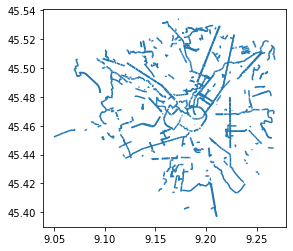

In [ ]:
# tramite il metodo plot possiamo disegnare il geodataset
ciclabili.plot()

In [ ]:
# caricare il geodataset dei quartieri di Milano ds964_nil_wm.zip

In [ ]:
# eseguiamo lo stesso procedimento per caricare il secondo geodataset
quartieri = geopandas.read_file("/content/drive/MyDrive/ds964_nil_wm (1).zip")
quartieri

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

In [ ]:
# installare (se necessario) e importare contextily e visualizzare la mappa di Milano con l'indicazione dei quartieri in nero (solo confini)
# e le piste ciclabili
ciclabili.crs
quartieri.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

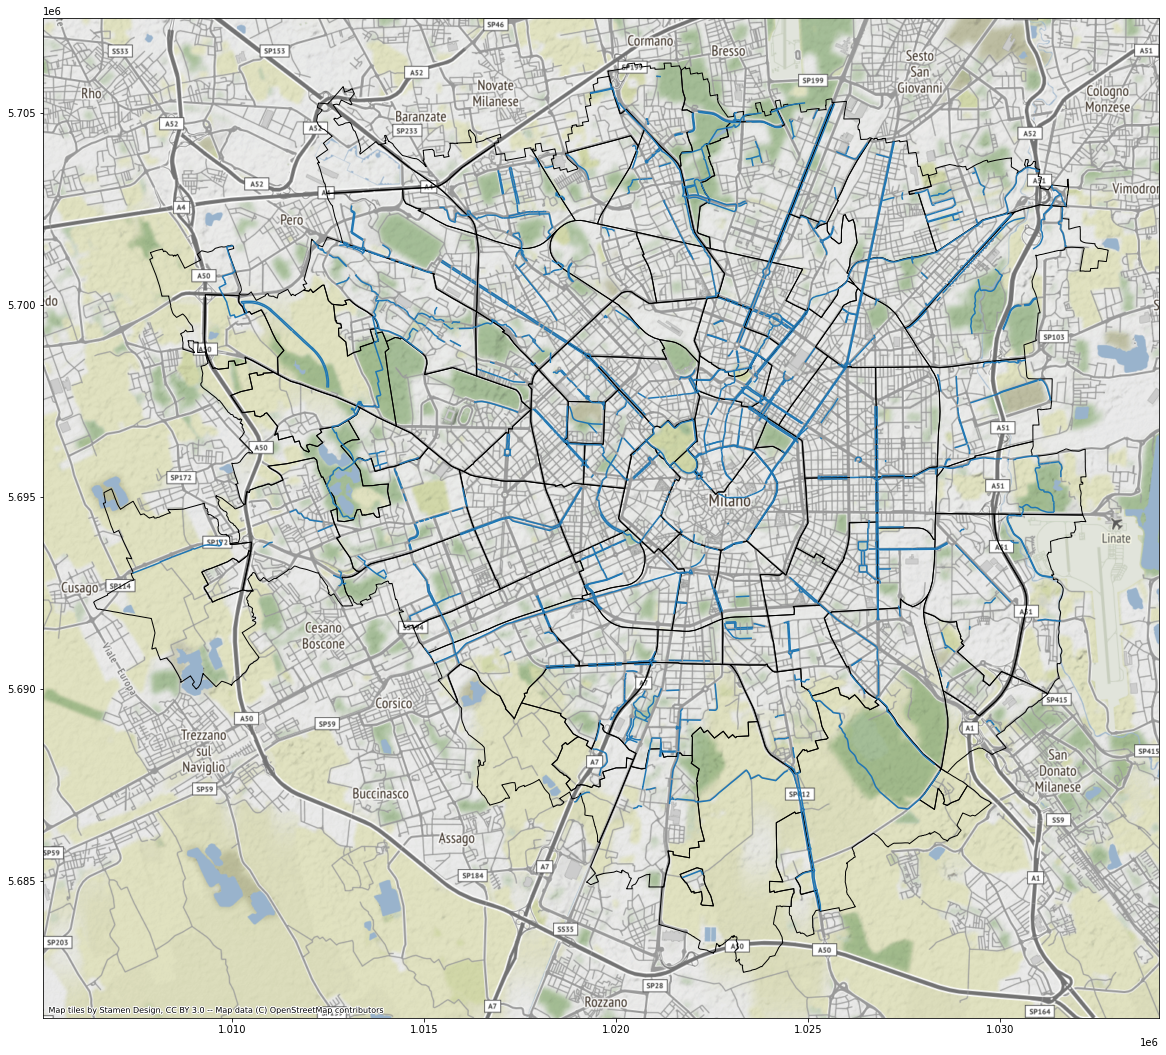

In [ ]:
ax = quartieri.to_crs(epsg=3857).plot(figsize =(20,20), facecolor="none", edgecolor = "k")
ciclabili.to_crs(epsg=3857).plot(ax=ax)
contextily.add_basemap(ax, crs=3857)

In [ ]:
# calcolare la dimensione media dell'area dei quartieri di Milano
media = quartieri['Shape_Area'].mean()
media

2065439.3298521973

In [ ]:
# visualizzare i nomi dei quartieri più grandi della media
quartieri[quartieri["Shape_Area"] > media]["NIL"]

0        RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO
7                     QUARTO OGGIARO - VIALBA - MUSOCCO
10                                   STADIO - IPPODROMI
12                                                DUOMO
27                  VILLAPIZZONE - CAGNOLA - BOLDINASCO
28                                PARCO BOSCO IN CITTA'
29                                     GORLA - PRECOTTO
30    NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...
33                TALIEDO - MORSENCHIO - Q.RE FORLANINI
36                                              ASSIANO
41                                      LODI - CORVETTO
47    Q.RE GALLARATESE - Q.RE SAN LEONARDO - LAMPUGNANO
48                               MONLUE' - PONTE LAMBRO
50         GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE
52                                         FORZE ARMATE
55                                  PARCO DELLE ABBAZIE
57                                           BANDE NERE
58                                    LAMBRATE -

In [ ]:
# visualizzare i quartieri più grandi della media sulla mappa di Milano

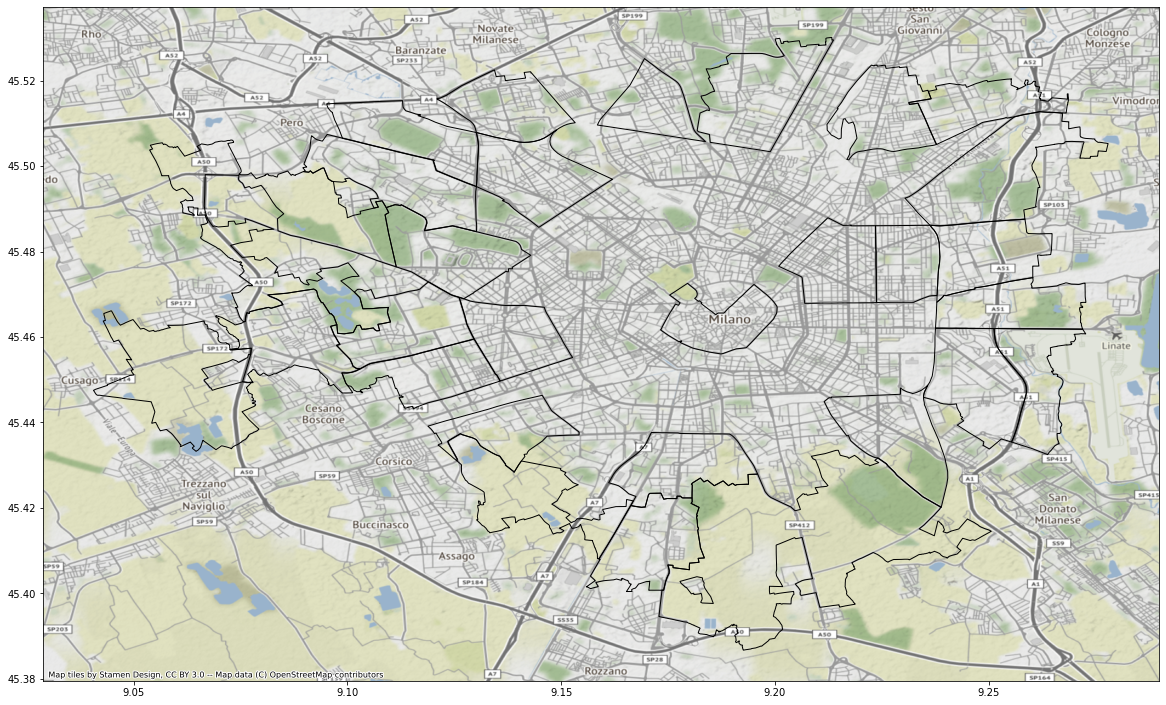

In [ ]:
ax = quartieri[quartieri["Shape_Area"] > media].plot(figsize =(20,20), facecolor="none", edgecolor = "k")
contextily.add_basemap(ax, crs=4326)

In [ ]:
# visualizzare una mappa con la legenda in modo che i quartieri più grandi abbiano colori diversi rispetto ai quartieri più piccoli. 
# La scala dei colori deve essere rossa e si deve riuscire ad intravedere in trasparenza la mappa sottostante

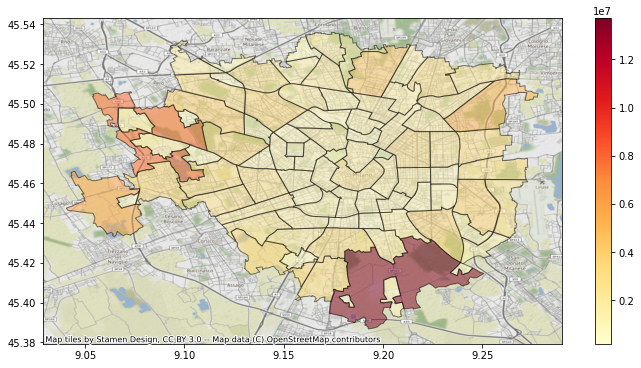

In [ ]:
ax = quartieri.plot(figsize = (12 , 6), column = "Shape_Area", legend=True, alpha = 0.5, edgecolor = "k", cmap='YlOrRd')
contextily.add_basemap(ax, crs=4326)

In [ ]:
# salvare in un geodataframe le informazioni sul quartiere di Greco, prendendole dal geodataframe dei quartieri

In [ ]:
Greco = quartieri[quartieri["NIL"]=="GRECO - SEGNANO"]
Greco

ID_NIL  ...                                           geometry
17      13  ...  POLYGON ((9.21220 45.50971, 9.21224 45.50922, ...

[1 rows x 9 columns]

In [ ]:
# trovare le piste ciclabili che passano per il quartiere di Greco

In [ ]:
GrecoCiclabili = ciclabili[ciclabili.intersects(Greco.geometry.squeeze())]

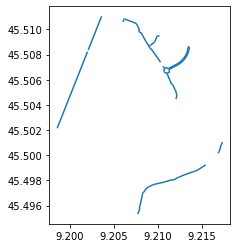

In [ ]:
GrecoCiclabili.plot()

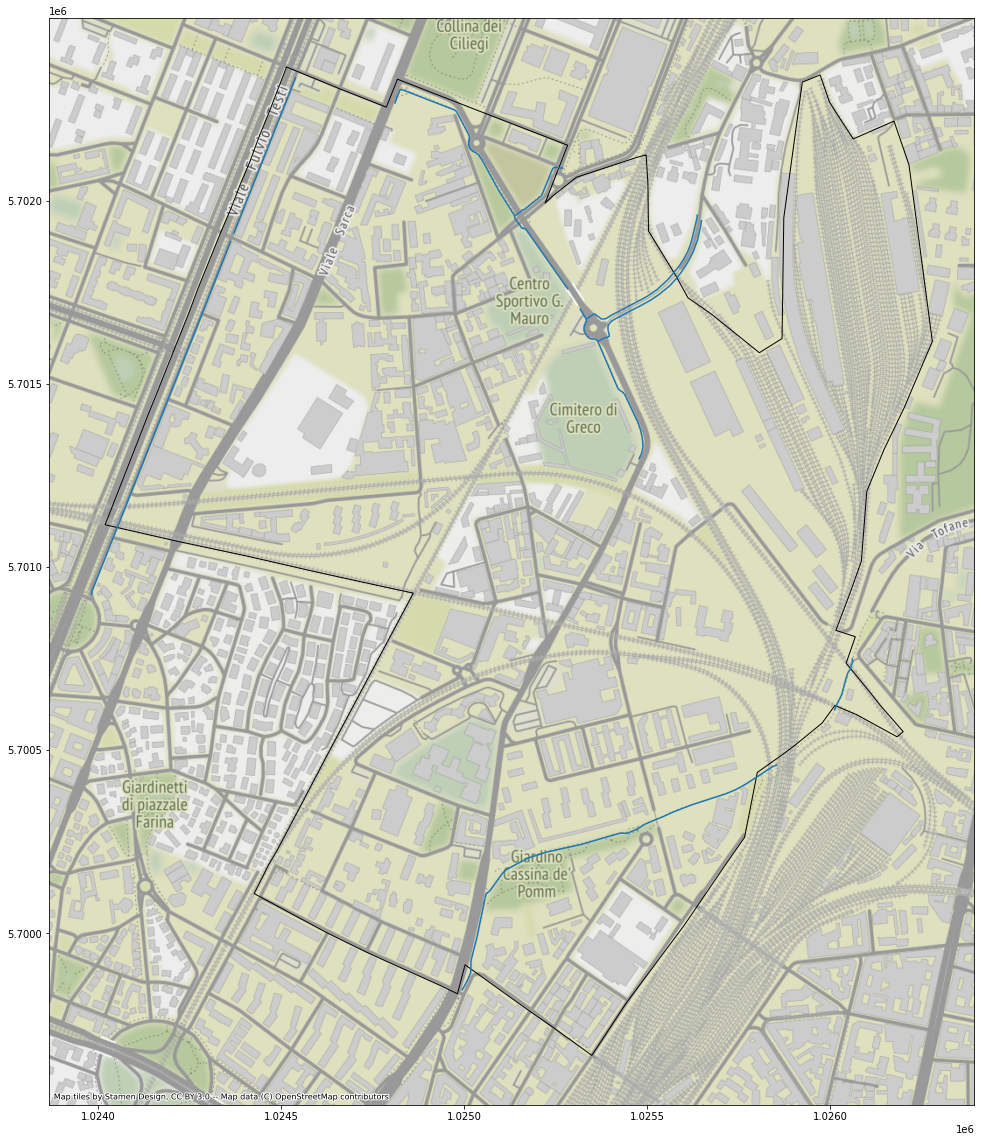

In [ ]:
ax = Greco.to_crs(epsg=3857).plot(figsize =(20,20), facecolor="none", edgecolor = "k")
GrecoCiclabili.to_crs(epsg=3857).plot(ax=ax)
contextily.add_basemap(ax, crs=3857)

In [ ]:
# visualizzare su una mappa il quartiere di Greco e le piste ciclabili che lo attraversano
# evidenziare bene in nero le piste ciclabili 

In [ ]:
ax = Greco.to_crs(epsg="3857").plot(figsize= (20, 20),facecolor="none",linewidth=1, edgecolor = "k")
GrecoCiclabili.to_crs(epsg="3857").plot(ax=ax, linewidth= 5, edgecolor= "k")
contextily.add_basemap(ax)